### Import Libraries

In [1]:
from requests_html import HTMLSession
from bs4 import BeautifulSoup
import pandas as pd
from tqdm.notebook import tqdm
import re
import math

### Fuctions to extract info from CORE webpage

In [2]:
# this function for the getting information from the web page

def get_paperinfo(paper_url):

    #download the page
    session = HTMLSession()
    response=session.get(paper_url)

  # check successful response
    if response.status_code != 200:
        print('Status code:', response.status_code)
        raise Exception('Failed to fetch web page ')

  #parse using beautiful soup
    paper_doc = BeautifulSoup(response.text,'html.parser')

    return paper_doc


def core_attributes(doc):
    
    '''
    recieves a doc file from the get_paperinfo function
    and returns title, ref and abstract from the CORE webpage
    '''
    
    # text contains title and references
    text = doc.main.find_all('h3')
    # ab contains the abstracts
    ab = doc.find_all("div", itemprop="abstract")
    
    papers = []
  
    for i, (t,a) in enumerate(zip(text,ab)):
        title = t.get_text()
        ref = t.a.get('href')
        abstract = a.get_text()
        
        # check if the article does not have an abstract
        if abstract == '':
            print(f'Article{i}: {title} has an empty abstract')
        
        # else append to a list
        else:
            papers.append([title, ref, abstract])

    return papers


### Generation of pandas df with stored paper data

In [4]:
# Getting information from CORE
gene = 'rab3d'
doc = get_paperinfo(f'https://core.ac.uk/search?q={gene}+AND+language%3A"en"&page=1')
n_output = doc.find("div", class_="styles_header__dGlUR").p.get_text()
#n_output = n_output.p.get_text()
number = re.findall('[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?', n_output)
number = float(number[0].replace(',', ''))
round_ = math.ceil(number/10)

#Create empty dataframe
df = pd.DataFrame(columns = ['title', 'ref', 'abstract'])

#Iterate over different pages on the CORE database to obtain titlt, ref and abstract and add to df
for l in tqdm(range(1,round_)):
    doc = get_paperinfo(f'https://core.ac.uk/search?q={gene}+AND+language%3A%22en%22&page={l}')
    papers = core_attributes(doc)
    dft = pd.DataFrame(papers, columns = ['title', 'ref', 'abstract'])
    df = pd.concat([df,dft])  
    
#df.to_csv('paper_info.csv')

  0%|          | 0/23 [00:00<?, ?it/s]

Article2: Delivery of Bone Marrow-Derived Mesenchymal Stem Cells Improves Tear Production in a Mouse Model of Sjögren’s Syndrome has an empty abstract
Article5: Alcoholic vs non-alcoholic fatty liver in rats: distinct differences in endocytosis and vesicle trafficking despite similar pathology has an empty abstract
Article4: Development of a multiplexed targeted mass spectrometry assay for LRRK2-phosphorylated Rabs and Ser910/Ser935 biomarker sites has an empty abstract
Article6: LncRNA expression in the spinal cord modulated by minocycline in a mouse model of spared nerve injury has an empty abstract
Article4: A single transcription factor is sufficient to induce and maintain secretory cell architecture has an empty abstract
Article7: Insulin resistance, diabetes, and the insulin-regulated trafficking of GLUT-4 has an empty abstract
Article0: Rab26 mediates selective targeting of synaptic vesicles to the autophagy pathway has an empty abstract
Article1: The rab family of small GTPases

In [5]:
df

,title,ref,abstract
0,Rab3D is critical for secretory granule matura...,https://core.ac.uk/works/6957877,Neuropeptide- and hormone-containing secretory...
1,Pathophysiology of acute experimental pancreat...,https://core.ac.uk/works/6807333,The incidence of acute pancreatitis is growing...
2,Expression of Rab3D N135I Inhibits Regulated S...,https://core.ac.uk/works/3433258,Rab proteins are small molecular weight GTPas...
3,Ethanol Induced Disordering of Pancreatic Acin...,https://core.ac.uk/works/85867056,Background &amp; aimsHeavy alcohol drinking is...
4,RAB family gene expression in breast cancer ce...,https://core.ac.uk/works/315391,The aim of this study was to investigate the r...
...,...,...,...
2,Intracellular processing of luteinising hormon...,https://core.ac.uk/works/8528693,The pituitary glycoproteins LH and FSH are sec...
3,Gene expression analysis in breast cancer,https://core.ac.uk/works/4761236,Breast cancer is the most common type of cance...
4,Investigation of the use of histone deacetylas...,https://core.ac.uk/works/38509591,Histone acetylation by histone acetyltransfera...
5,Unravelling the mechanism of differential biol...,https://core.ac.uk/works/17479413,The multiple actions of estradiol and other es...


#### Here comes the difficult part..... how to extract info from the abstracts..
One way to do it is to tokenize the texts

In [6]:
# Create a processes list from the Sheet2 of the secRecon dataset
processes_df = pd.read_csv('processes_list.csv')

processes = []
for p in processes_df[';Process Term']:
    p = p.lower()
    p = p.replace(';', '')
    processes.append(p)

print(processes)

['acetylation', 'acetyltransferase', 'additional', 'apoptosis', 'association with machinery', 'atf6 pathway', 'autophagosome formation', 'autophagy', 'carboxylase', 'carboxylation', 'cell and nuclear shrinkage', 'chondroitin sulfate', 'clathrin', 'co-translational translocation', 'coat', 'copi', 'copii', 'deacetylase', 'decarboxylase', 'direction', 'disulfide bond formation', 'endocytosis', 'endosome', 'energy-dependent translocation', 'er calcium homeostasis', 'er stress response/upr', 'er to golgi', 'erad', 'execution pathway', 'exocytosis', 'extrinsic pathway', 'function', 'ganglio series', 'globo series', 'glycosaminoglycan', 'glycosylation', 'golgi to er (retrograde)', 'gpi-anchor', 'gt ambiguous', 'heparan sulfate', 'hyaluronic acid', 'hydroxylysine', 'identificaton/targeting', 'intrinsic pathway', 'ire1 pathway', 'keratan sulfate', 'kinase', 'lacto/neolacto series', 'lipidation', 'lysosome', 'membrane fusion', 'multimerization', 'n-glycan', 'nucleotide-sugar transporter', 'o-gly

In [8]:
# Find how many abstracts in the entire dataset contains the specific process 
from nltk.tokenize import word_tokenize

relativities = []

for process in processes:
    count = 0
    for txt in df['abstract']:
        text = txt
        tokens = word_tokenize(text)
        if process in tokens:
            count += 1
        else:
            continue

    percentage = count/len(df['abstract'])*100
    relativities.append(percentage)

print(relativities)

[0.9950248756218906, 0.4975124378109453, 4.477611940298507, 4.477611940298507, 0.0, 0.0, 0.0, 2.4875621890547266, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4975124378109453, 0.0, 0.0, 0.4975124378109453, 0.0, 0.9950248756218906, 0.0, 1.9900497512437811, 1.9900497512437811, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.925373134328357, 0.0, 28.855721393034827, 0.0, 0.0, 0.4975124378109453, 0.4975124378109453, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.965174129353234, 0.0, 0.0, 0.9950248756218906, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.388059701492537, 1.9900497512437811, 0.0, 0.0, 2.9850746268656714, 4.477611940298507, 0.0, 0.0, 0.0, 0.0, 0.4975124378109453, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.4875621890547266, 0.9950248756218906, 0.0, 0.0, 0.0, 0.0]


In [27]:
import matplotlib.pyplot as plt
import numpy as np
d = {'Process':processes,'Rel':relativities}
rel_df = pd.DataFrame(d, columns=['Process','Rel'])
rel_df = rel_df.replace(0, np.nan)
rel_df = rel_df.dropna(how='any', axis=0)
rel_df = rel_df.replace(np.nan, 0)
rel_df = rel_df.sort_values('Rel', ascending=False)
rel_df

,Process,Rel
31,function,28.855721
58,other,22.388060
29,exocytosis,14.925373
46,kinase,6.965174
2,additional,4.477612
3,apoptosis,4.477612
63,phosphorylation,4.477612
62,phosphatase,2.985075
7,autophagy,2.487562
75,translocation,2.487562


/var/folders/_x/tfg8s2ks4n1ftkkwzp5sqjpc0000gn/T/ipykernel_3276/3243372874.py:22: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


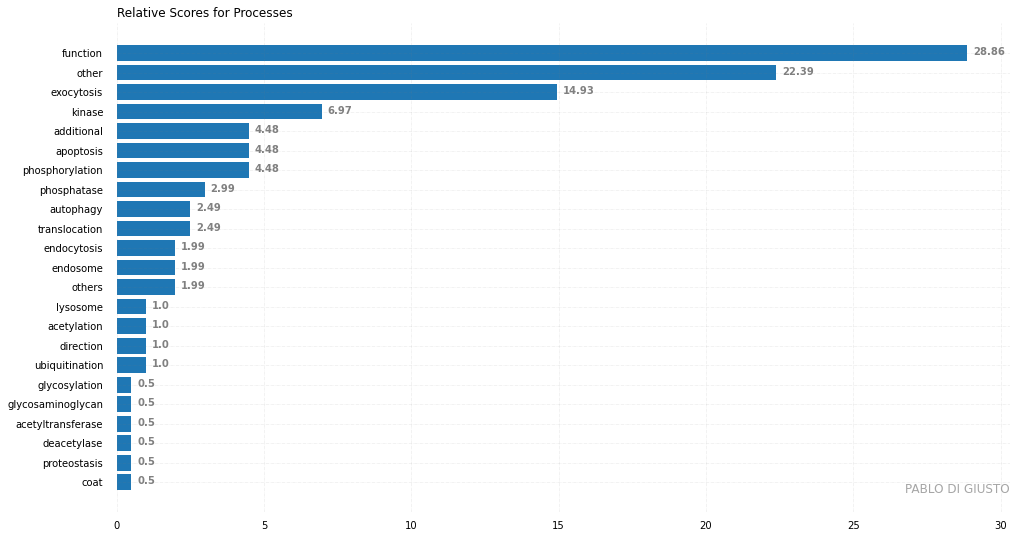

In [28]:
#PLOT

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(rel_df['Process'], rel_df['Rel'])
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Relative Scores for Processes',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'PABLO DI GIUSTO', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

In [21]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()
#processes = ['lysosome', 'endocytosis', 'secretion', 'lipidation', 'kinase', 'glycosilation', 'heparan sulfate']

abstract_list = []
for txt in df['abstract']:
    text = txt
    tokens = word_tokenize(text)
    stemmed = []
    for token in tokens:
        stemmed_word = ps.stem(token)
        stemmed.append(stemmed_word)
    abstract_list.append(stemmed)
print(abstract_list[0])

['neuropeptide-', 'and', 'hormone-contain', 'secretori', 'granul', '(', 'sg', ')', 'are', 'synthes', 'at', 'the', 'trans-golgi', 'network', '(', 'tgn', ')', 'as', 'immatur', 'secretori', 'granul', '(', 'isg', ')', 'and', 'complet', 'their', 'matur', 'in', 'the', 'f-actin-rich', 'cell', 'cortex', '.', 'thi', 'matur', 'process', 'is', 'character', 'by', 'acidification-depend', 'process', 'of', 'cargo', 'protein', ',', 'condens', 'of', 'the', 'sg', 'matrix', 'and', 'remov', 'of', 'membran', 'and', 'protein', 'not', 'destin', 'to', 'matur', 'secretori', 'granul', '(', 'msg', ')', '.', 'here', 'we', 'address', 'a', 'potenti', 'role', 'of', 'rab3', 'isoform', 'in', 'these', 'matur', 'step', 'by', 'express', 'their', 'nucleotide-bind', 'defici', 'mutant', 'in', 'pc12', 'cell', '.', 'our', 'data', 'show', 'that', 'the', 'presenc', 'of', 'rab3d', '(', 'n135i', ')', 'decreas', 'the', 'restrict', 'of', 'matur', 'sg', 'to', 'the', 'f-actin-rich', 'cell', 'cortex', ',', 'block', 'the', 'remov', 'of

In [33]:
new_abstract_list = [' '.join(abstract) for abstract in abstract_list]
print(new_abstract_list[0])

given their oblig intracellular lifestyl , chlamydia trachomati ensur their access to multipl host sourc of essenti lipid by interf vesicular transport . these bacteria hijack rab6- , rab11- and rab14-control traffick pathway to acquir sphingomyelin from the golgi apparatu . anoth import sourc of sphingolipid , phospholipid and cholesterol are multivesicular bodi ( mvb ) . despit their particip in chlamydi inclus develop and bacteri replic , the molecular mechan mediat mvbs-inclus interact remain unknown . in the present studi , we demonstr that rab39a label a subset of late endocyt vesicl -mainli mvbs- that move along microtubul . moreov , rab39a is activ recruit to chlamydi inclus throughout the pathogen life cycl by a bacterial-driven process and depend on it gtp/gdp bind state . interestingli , rab39a particip in the deliveri of mvb and host sphingolipid to matur chlamydi inclus therebi promot inclus growth and bacteri develop . altogeth , our find indic that rab39a favour chlamydi

In [18]:
print(abstract_list)

[['legionella', 'pneumophila', ',', 'the', 'caus', 'agent', 'of', 'legionnair', "'s", 'diseas', ',', 'use', 'it', 'type', 'iv', 'secret', 'system', 'to', 'transloc', 'over', '300', 'effector', 'protein', 'into', 'host', 'cell', '.', 'these', 'effector', 'subvert', 'host', 'cell', 'signal', 'pathway', 'to', 'ensur', 'bacteri', 'prolifer', '.', 'despit', 'their', 'import', 'for', 'pathogenesi', ',', 'the', 'role', 'of', 'most', 'of', 'the', 'effector', 'are', 'yet', 'to', 'be', 'character', '.', 'key', 'to', 'understand', 'the', 'function', 'of', 'effector', 'is', 'the', 'identif', 'of', 'host', 'protein', 'they', 'bind', 'dure', 'infect', '.', 'we', 'previous', 'develop', 'a', 'novel', 'tandem-affin', 'purif', '(', 'tap', ')', 'approach', 'use', 'hexahistidin', 'and', 'bira-specif', 'biotinyl', 'tag', 'for', 'isol', 'transloc', 'effector', 'complex', 'from', 'infect', 'cell', 'whose', 'composit', 'were', 'subsequ', 'deciph', 'by', 'mass', 'spectrometri', '.', 'here', 'we', 'further', 'a

In [89]:
from sklearn.feature_extraction.text import CountVectorizer

# initialize
cv = CountVectorizer(max_features=100,stop_words='english') 
cv_matrix = cv.fit_transform(new_abstract_list) 
# create document term matrix
df_dtm = pd.DataFrame(cv_matrix.toarray(), index=df['title'].values, columns=cv.get_feature_names_out())
df_dtm

,43,activ,addit,affect,aggreg,al,analysi,associ,bind,c9orf72,...,tdp,th17,thi,transcript,transport,understand,use,variant,wa,work
The late endocytic Rab39a GTPase regulates the interaction between multivesicular bodies and chlamydial inclusions.,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
Twist1 Directly Regulates Genes That Promote Cell Proliferation and Migration in Developing Heart Valves,0,0,1,0,0,0,0,0,3,0,...,0,0,0,3,0,0,1,0,2,0
Rab39a and Rab39b display different intracellular distribution and function in sphingolipids and phospholipids transport,0,0,0,0,0,4,1,0,0,0,...,0,0,0,0,5,0,2,0,0,0
Effect of Rab39 on Autophagy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
GM-CSF Signalling Boosts Dramatically IL-1Production,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Analysis of Helicobacter pylori VacA-containing vacuoles and VacA intracellular trafficking,0,2,0,0,0,0,0,0,0,0,...,0,0,6,0,2,0,1,0,3,0
Investigating the Nuclear Function of the C9orf72 Protein in Amyotrophic Lateral Sclerosis,0,0,0,0,0,8,0,0,1,20,...,0,0,3,0,0,1,0,0,2,1
The Investigation of Targets for Therapy in Brain Tumours,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,1,0,3,0
Autism Spectrum Disorders,0,0,3,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
df_dtm['will'].sum()

16